#Muhammad Abdullah
#ma07534

#Data Science HW 4

In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltlib

In [2]:
conn = psycopg2.connect(database="DSHW4", user="postgres", password="1234", host="127.0.0.1", port="5432")
print("Opened database successfully")

Opened database successfully


In [3]:
# Query to load the countries table into a pandas DataFrame
countries_query = "SELECT * FROM countries;"
countries_df = pd.read_sql_query(countries_query, conn)

# Query to load the cities table into a pandas DataFrame
cities_query = "SELECT * FROM cities;"
cities_df = pd.read_sql_query(cities_query, conn)

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_56280\3345516777.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  countries_df = pd.read_sql_query(countries_query, conn)
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_56280\3345516777.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cities_df = pd.read_sql_query(cities_query, conn)


In [4]:
cities_df.head()

,city_id,city_name,city_population,capital,fact_id
0,1,Oranjestad,37000,True,216
1,2,Saint John'S,27000,True,6
2,3,Abu Dhabi,942000,True,184
3,4,Dubai,1978000,False,184
4,5,Sharjah,983000,False,184


In [5]:
mostpopulated = cities_df.nlargest(12, 'city_population')
print(mostpopulated)

     city_id                  city_name  city_population  capital  fact_id
189      190                      Tokyo         37217000     True       85
160      161                  New Delhi         22654000     True       77
239      240                Mexico City         20446000     True      114
366      367            New York-Newark         20352000    False      186
79        80                   Shanghai         20208000    False       37
52        53                  Sao Paulo         19924000    False       24
161      162                     Mumbai         19744000    False       77
80        81                    Beijing         15594000     True       37
36        37                      Dhaka         15391000     True       14
126      127  Marseille-Aix-en-Provence         14890100    False       61
162      163                    Kolkata         14402000    False       77
272      273                    Karachi         13876000    False      132


       country_birth_rate  city_population
count          397.000000     3.970000e+02
mean            18.772015     2.497947e+06
std              8.743357     3.999901e+06
min              7.420000     1.000000e+03
25%             12.150000     6.350000e+05
50%             16.640000     1.194000e+06
75%             22.580000     2.449000e+06
max             45.450000     3.721700e+07


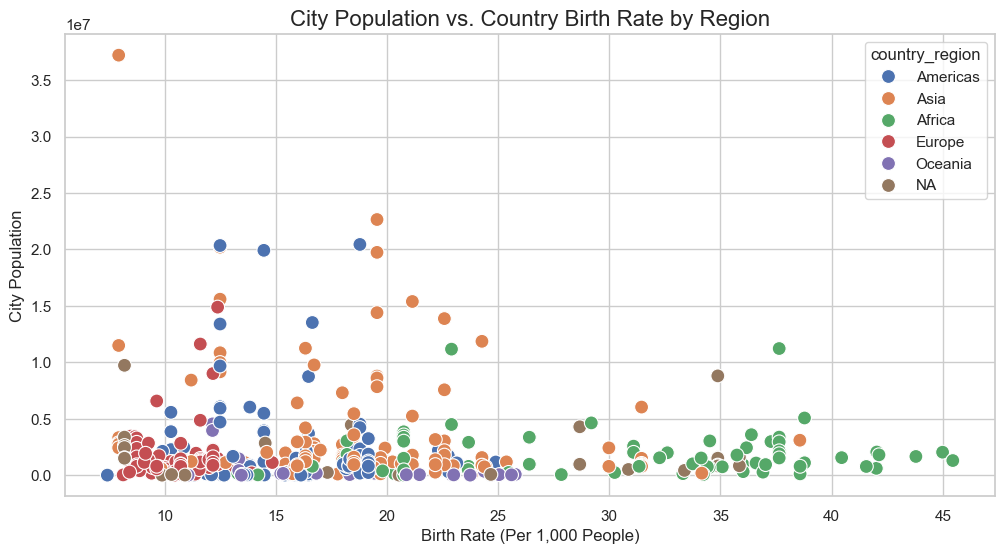

In [6]:
merged_df = pd.merge(cities_df, countries_df, on='fact_id', how='inner')
summary_stats = merged_df[['country_name' , 'country_birth_rate', 'city_population']].describe()
print(summary_stats)

sns.set(style="whitegrid")

pltlib.figure(figsize=(12, 6))
sns.scatterplot(x='country_birth_rate', y='city_population', hue='country_region', data=merged_df, s=100)

pltlib.title('City Population vs. Country Birth Rate by Region', fontsize=16)
pltlib.xlabel('Birth Rate (Per 1,000 People)', fontsize=12)
pltlib.ylabel('City Population', fontsize=12)

pltlib.show()

The average birth rate across countries is 18.77, with a standard deviation of 8.7. This indicates that most countries fall within a range of 10 to 27 births per 1,000. The minimum birth rate is 7, while the maximum is 45, showing significant variation across countries.

The average city population is 250,000, but the large standard deviation of 400,000 shows that there is substantial variability, likely driven by a few extremely large cities. The minimum city population is 1000, while the maximum is 37 million, indicating the presence of megacities and smaller towns in the dataset.

In this scatter plot of city population vs. birth rate, colored by region -- we can see the population density and birthrate statistics. This statistic is important for us as we can see a an inverse relationship between different regions of the world. For example, we can see that European cities have smaller birth rates, and smaller city populations. In contrast we can see that African cities have higher birth rates despite smaller city populations.

#-------------------------------------------------------------------------------

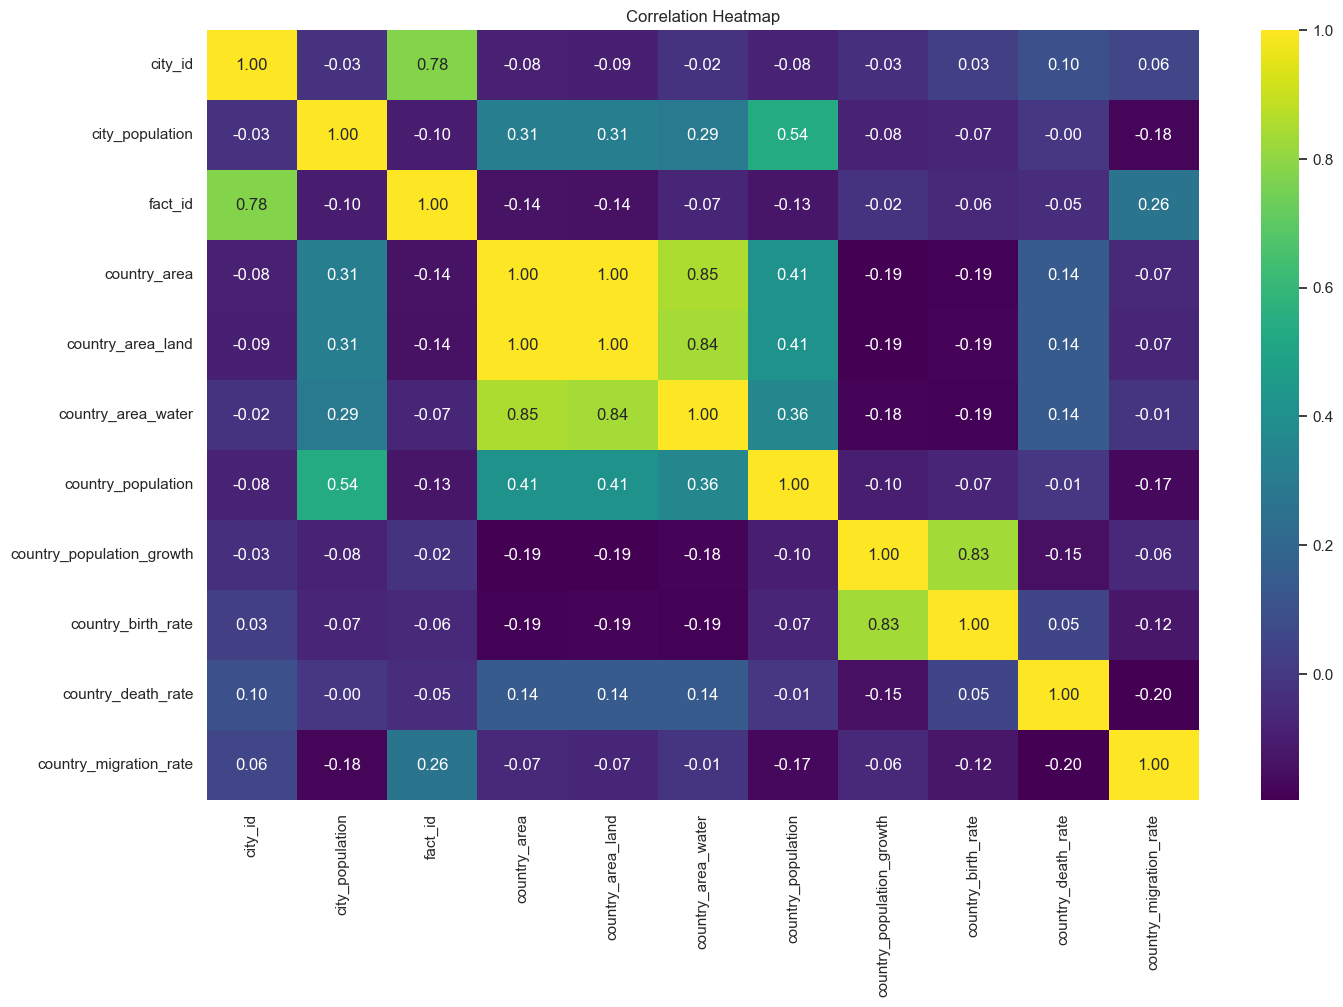

In [7]:
numeric_df = merged_df.select_dtypes(include=['number'])

pltlib.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
pltlib.title('Correlation Heatmap')
pltlib.show()

We can observe interesting correlations in this. One strong positive correlation we see is between country_area_water and country_population. This makes sense since a fundamental understanding of human civilizations dictates that humanity has settled and preferred to live in regions with water sources -- owing to the crucial role water plays for economies. This strong correlation confirms that this is still true today. In the spirit of water distribution science, lets find insights into this using the describe function.

In [8]:
summary_stats = merged_df[['country_area_water', 'country_population']].describe()
print(summary_stats)

       country_area_water  country_population
count          397.000000        3.970000e+02
mean         58541.680101        8.727498e+07
std         164065.207194        2.258763e+08
min              0.000000        3.361000e+03
25%            300.000000        5.476922e+06
50%           4620.000000        2.775232e+07
75%          23070.000000        6.655377e+07
max         891163.000000        1.367485e+09


The average water area for a country is approximately 58,542 square kilometers. This is skewed by a few countries with large water areas. The standard deviation of 164,065 indicates high variability, suggesting that there are countries with either very small or very large water areas.

The average population is 87.3 million, but this is skewed by a few highly populous countries, as we can infer from the large standard deviation. A high standard deviation of 225.9 million suggests significant variability in country populations.tries in terms of both metrics heavily skew the averages.

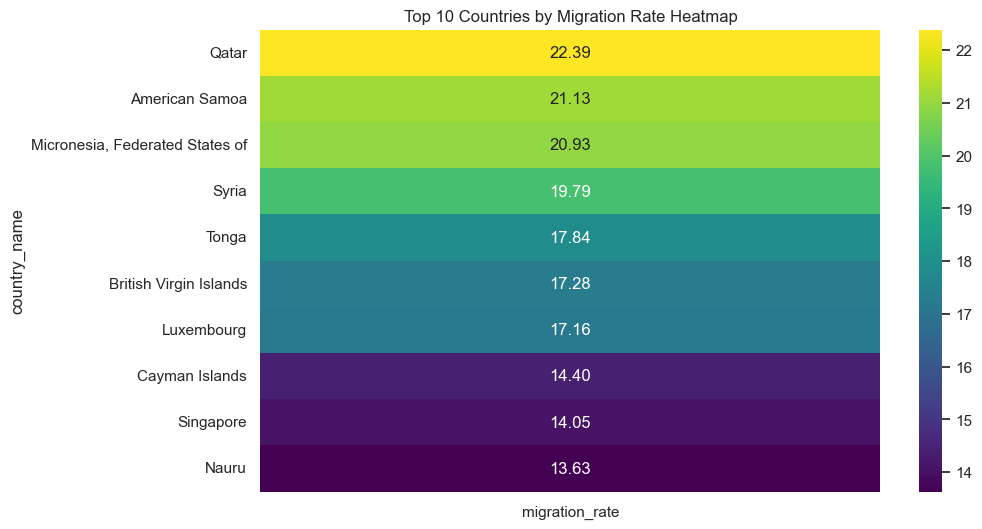

In [9]:
migration_data = pd.DataFrame({
    'country_name': countries_df['country_name'],
    'migration_rate': countries_df['country_migration_rate']
})

migration_data.set_index('country_name', inplace=True)
top_10_migration_data = migration_data.nlargest(10, 'migration_rate')

pltlib.figure(figsize=(10, 6))
sns.heatmap(top_10_migration_data[['migration_rate']], annot=True, cmap='viridis', fmt=".2f", cbar=True)
pltlib.title("Top 10 Countries by Migration Rate Heatmap")
pltlib.show()

In this we can see the countries with the highest migration rates. Migration rates are linked to people wanting a better standard of life/trying to escape from War etc. With better context (more data, time of collection etc) this can also be further analyzed. 

In [10]:
migration_summary_stats = top_10_migration_data.describe()
print(migration_summary_stats)
print(top_10_migration_data)

       migration_rate
count       10.000000
mean        17.860000
std          3.154732
min         13.630000
25%         15.090000
50%         17.560000
75%         20.645000
max         22.390000
                                 migration_rate
country_name                                   
Qatar                                     22.39
American Samoa                            21.13
Micronesia, Federated States of           20.93
Syria                                     19.79
Tonga                                     17.84
British Virgin Islands                    17.28
Luxembourg                                17.16
Cayman Islands                            14.40
Singapore                                 14.05
Nauru                                     13.63


The average migration rate across these countries is approximately 17.86 people per 1,000, with rates ranging from 13.63 to 22.39. Qatar leads with the highest migration rate of 22.39, reflecting its position as a major destination for foreign workers. Close behind are American Samoa and the Federated States of Micronesia, with rates of 21.13 and 20.93, respectively, indicating significant movement into these smaller islands.